In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cd /content/drive/MyDrive/TX2-VAE-LSTM-for-anomaly-detection/codes

/content/drive/MyDrive/TX2-VAE-LSTM-for-anomaly-detection/codes


In [4]:
ls

base.py         NAB_config.json  train.py
data_loader.py  __pycache__/     Tx2NAB-anomaly-detection_k1.ipynb
modelss.py      trainers.py      utils.py


In [5]:
# !pip install tensorflow-probability==0.7.0
# !pip install numpy==1.16.0
# !pip install pandas==0.25.3
# !pip install tensorflow-gpu==1.15.2
# !pip install GPy==1.9.9
# !pip install munch==2.3.2
# !pip install opencv-contrib-python==4.1.0.25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# !pip install numpy==1.16.0
# !pip install pandas==0.25.3

In [7]:
# !pip install tensorflow-gpu==1.15.2

In [8]:
# !pip install GPy==1.9.9
# !pip install munch==2.3.2

In [9]:
# !pip install opencv-contrib-python==4.1.0.25

In [10]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import plot, ion, show, savefig, cla, figure
import random
import time

In [11]:
tf.__version__

'1.15.2'

In [12]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
from data_loader import DataGenerator
from modelss import VAEmodel, lstmKerasModel
from trainers import vaeTrainer

from utils import process_config, create_dirs, get_args

In [13]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

[]


In [14]:
from modelss import VAEmodel, lstmKerasModel
tf.reset_default_graph()

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
config = process_config('NAB_config.json')
model_vae = VAEmodel(config)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

kstrat
Tensor("encoder/MirrorPad:0", shape=(?, 56, 3, 1), dtype=float32)
22
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__cal

In [15]:
data = DataGenerator(config)

3500
3500
n_train_sample 3500
(3453, 48)
3500
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
60
60
60
(54, 12, 48, 2)
(54, 12, 48, 3)
(6, 12, 48, 2)
(6, 12, 48, 3)
train_set_lstm (54, 12, 48, 3)


In [16]:
sess

In [17]:
data

In [18]:
# tf.reset_default_graph()
# # load VAE model
# config = process_config('NAB_config.json')
# # create the experiments dirs|t_dir']])
# # create tensorflow session
# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
# # create your data generator
# data = DataGenerator(config)
# # create a CNN model
# model_vae = VAEmodel(config)
# create a CNN model
trainer_vae = vaeTrainer(sess, model_vae, data, config)
model_vae.load(sess)



checkpoint_dir at loading: ../experiments/local-results/NAB/machine_temp/batch-32/NAB-machine_temp-48-12-6-fixedSigma-0.1/checkpoint/
No model loaded.


# 새 섹션

In [19]:
# load LSTM model
lstm_model = lstmKerasModel(data)
lstm_model.produce_embeddings(config, model_vae, data, sess)
lstm_nn_model = lstm_model.create_lstm_model(config)
lstm_nn_model.summary()   # Display the model's architecture

# checkpoint path
checkpoint_path = config['checkpoint_dir_lstm'] + "cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# load weights if possible
lstm_model.load_model(lstm_nn_model, config, checkpoint_path)

(?, 48, 3)
data.train_set_lstem (54, 12, 48, 3)
Finish processing the embeddings of the entire dataset.
The first a few embeddings are
[[-0.00088837 -0.01491466  0.00817035 -0.0114984   0.00147019  0.00982459]
 [ 0.00200605  0.00127994  0.00623388 -0.00466427  0.0023045   0.00739752]
 [-0.00297168  0.001357    0.00291435 -0.00444957  0.00228554  0.00478863]
 [-0.02778301 -0.01165077  0.00461865 -0.01671272  0.02075655  0.00156428]
 [-0.00527681 -0.00085924  0.00397141 -0.00340696  0.00470527  0.0034792 ]]
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11, 6)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 11, 64)            18176     
_______________________________________________________________

In [20]:
# load normalised time series
save_dir = '../datasets/NAB-known-anomaly/'
dataset = config['dataset']
filename = '{}.npz'.format(dataset)
result = dict(np.load(save_dir+filename, allow_pickle=True))

#custom
dataset1 = config['dataset1']
filename1 = '{}.npz'.format(dataset1)
# print(filename1)
dataset2 = config['dataset2']
filename2 = '{}.npz'.format(dataset2)

dataset3 = config['dataset3']
filename3 = '{}.npz'.format(dataset3)

# dataset4 = config['dataset4']
# filename4 = '{}.npz'.format(dataset4)

result1 = dict(np.load(save_dir+filename1, allow_pickle=True))
result2 = dict(np.load(save_dir+filename2, allow_pickle=True))
result3 = dict(np.load(save_dir+filename3, allow_pickle=True))
# result4 = dict(np.load(save_dir+filename4, allow_pickle=True))


# result['test'] = result['test'][1] #result['test'][0] = 5000, result['test'][1] = 7195
# print(result1['test'][0].shape) #result['test'] = 2 #테스트 데이터 행렬이 2개고 첫번쨰게 5000개 다음게 7195개(전체)

result['test'] = result['test'][0]
print("result['idx_anomaly_test']",result['idx_anomaly_test'])
result['idx_anomaly_test'] = result['idx_anomaly_test'][0]
print("result['idx_anomaly_test']",result['idx_anomaly_test'])
result['t_test'] = result['t_test'][0]
# print(filename)

# print(result1['test'][1].shape)

# print(result['test'])
# print(result1['test'].shape) #1채널상태야
# print(result['test'].shape) #2채널 array 상태야. 지금 뭔가 잘못함. 데이터 로드 어케했냐
# result1['test'] = result1['test'][0]

# print(result1['test'])
# print(result['test'])
# print()
# print(result1['test'])


# print(result1['test'])
result1['test'] = result1['test'][0]
print("result1['idx_anomaly_test']",result1['idx_anomaly_test'])
result1['idx_anomaly_test'] = result1['idx_anomaly_test'][1]
result1['t_test'] = result1['t_test'][0]
# result1['test']= result1['test'][0]
print("result1['idx_anomaly_test']",result1['idx_anomaly_test'])

print(result1['test'].shape) #1채널상태야
print(result1['test'][0].shape)
print(result1['test'][1].shape)
print()
print()
print(result['test'].shape)
print(result['test'][0].shape)
print(result['test'][1].shape)

result2['test'] = result2['test'][0]
result2['idx_anomaly_test'] = result2['idx_anomaly_test'][1]
print("result2['idx_anomaly_test']",result2['idx_anomaly_test'])
result2['t_test'] = result2['t_test'][0]

result3['test'] = result3['test'][0]
result3['idx_anomaly_test'] = result3['idx_anomaly_test'][1]
print("result3['idx_anomaly_test']",result3['idx_anomaly_test'])
result3['t_test'] = result3['t_test'][0]

# result4['test'] = result4['test'][0]
# result4['idx_anomaly_test'] = result4['idx_anomaly_test'][0]
# result4['t_test'] = result4['t_test'][0]

# slice into rolling windows and rolling sequences
def slice_rolling_windows_and_sequences(config, time_seq):
    n_sample = len(time_seq)
    print("The given sequence has {} samples".format(n_sample))
    n_vae_win = n_sample - config['l_win'] + 1
    rolling_windows = np.zeros((n_vae_win, config['l_win']))
    
    for i in range(n_vae_win):
        rolling_windows[i] = time_seq[i:i + config['l_win']]
        sample_m = np.mean(rolling_windows, axis=1)
        sample_std = np.std(rolling_windows, axis=1)

        n_lstm_seq = n_sample - config['l_seq']*config['l_win']+1
        lstm_seq = np.zeros((n_lstm_seq, config['l_seq'], config['l_win']))
    for i in range(n_lstm_seq):
        cur_seq = time_seq[i:i+config['l_seq']*config['l_win']]
        for j in range(config['l_seq']):
            lstm_seq[i,j] = cur_seq[config['l_win']*j:config['l_win']*(j+1)]
    
    return rolling_windows, lstm_seq, sample_m, sample_std

#action
test_windows, test_seq, test_sample_m, test_sample_std = slice_rolling_windows_and_sequences(config, result['test'])
test_windows1, test_seq1, test_sample_m1, test_sample_std1 = slice_rolling_windows_and_sequences(config, result1['test'])
test_windows2, test_seq2, test_sample_m2, test_sample_std2 = slice_rolling_windows_and_sequences(config, result2['test'])
test_windows3, test_seq3, test_sample_m3, test_sample_std3 = slice_rolling_windows_and_sequences(config, result3['test'])


test_windows1 = np.expand_dims(test_windows1, -1)
test_seq1 = np.expand_dims(test_seq1, -1)

test_windows2 = np.expand_dims(test_windows2, -1)
test_seq2 = np.expand_dims(test_seq2, -1)

test_windows3 = np.expand_dims(test_windows3, -1)
test_seq3 = np.expand_dims(test_seq3, -1)

test_windows1 = np.append(test_windows1,test_windows2,-1)
test_windows1 = np.append(test_windows1,test_windows3,-1)

test_seq1 = np.append(test_seq1,test_seq2,-1)
test_seq1 = np.append(test_seq1,test_seq3,-1)

print(test_windows1.shape)
print(test_seq1.shape)

result['idx_anomaly_test'] [[2410 3987]
 [ 841 4016]]
result['idx_anomaly_test'] [2410 3987]
result1['idx_anomaly_test'] [array([], dtype=float64) array([242, 589])]
result1['idx_anomaly_test'] [242 589]
(1000,)
()
()


(5000,)
()
()
result2['idx_anomaly_test'] [242 589]
result3['idx_anomaly_test'] [242 320]
The given sequence has 5000 samples
The given sequence has 1000 samples
The given sequence has 1000 samples
The given sequence has 1000 samples
(953, 48, 3)
(425, 12, 48, 3)


In [21]:
# Evaluate ELBO and LSTM prediction error on the validation set
# evaluate some anomaly detection metrics
def evaluate_vae_anomaly_metrics_for_a_window(test_win):
    print(test_win.shape)
    feed_dict = {model_vae.original_signal: np.expand_dims(test_win, 0),
                 model_vae.is_code_input: False,
                 model_vae.code_input: np.zeros((1, config['code_size']))}

    # VAE reconstruction error
    recons_win_vae = np.squeeze(sess.run(model_vae.decoded, feed_dict=feed_dict))
    test_vae_recons_error = np.sum(np.square(recons_win_vae - test_win))

    # VAE latent embedding likelihood
    vae_code_mean, vae_code_std = sess.run([model_vae.code_mean, model_vae.code_std_dev], feed_dict=feed_dict)
    test_vae_kl = 0.5 * (np.sum(np.square(vae_code_mean)) + \
                            np.sum(np.square(vae_code_std)) - \
                            np.sum(np.log(np.square(vae_code_std))) - config['code_size'])

    # VAE ELBO loss ,1/10 sigma2해봄
    sigma2 = 0.00005
    input_dims = model_vae.input_dims
    sigma_regularisor = input_dims/2. * np.log(sigma2) + input_dims * np.pi
    test_vae_elbo = test_vae_recons_error/sigma2 + test_vae_kl + sigma_regularisor
    return test_vae_recons_error, test_vae_kl, test_vae_elbo

def evaluate_lstm_anomaly_metric_for_a_seq(test_seq):
    feed_dict = {model_vae.original_signal: test_seq,
                 model_vae.is_code_input: False,
                 model_vae.code_input: np.zeros((1, config['code_size']))}
    vae_embedding = np.squeeze(sess.run(model_vae.code_mean, feed_dict=feed_dict))
    #print(vae_embedding.shape)

    #배치사이즈 1에서 32로 바꿔ㅓ봄
    lstm_embedding = np.squeeze(lstm_nn_model.predict(np.expand_dims(vae_embedding[:config['l_seq']-1], 0), batch_size=32))
    lstm_embedding_error = np.sum(np.square(vae_embedding[1:] - lstm_embedding))
    
    # LSTM prediction error
    feed_dict_lstm = {model_vae.original_signal: np.zeros((config['l_seq'] - 1, config['l_win'], config['n_channel'])), #여기 2이다.(채널로 바꿨다.)
                      model_vae.is_code_input: True,
                      model_vae.code_input: lstm_embedding}
    recons_win_lstm = np.squeeze(sess.run(model_vae.decoded, feed_dict=feed_dict_lstm))
    lstm_recons_error = np.sum(np.square(recons_win_lstm - np.squeeze(test_seq[1:])))
    return lstm_recons_error, lstm_embedding_error

n_val_vae = data.val_set_vae['data'].shape[0]
n_val_lstm = data.val_set_lstm['data'].shape[0]

val_vae_recons_error = np.zeros(n_val_vae)
val_vae_kl_error = np.zeros(n_val_vae)
val_vae_elbo_loss = np.zeros(n_val_vae)
for i in range(n_val_vae):
    val_vae_recons_error[i], val_vae_kl_error[i], val_vae_elbo_loss[i] = evaluate_vae_anomaly_metrics_for_a_window(data.val_set_vae['data'][i])

val_lstm_recons_error, val_lstm_embedding_error = np.zeros(n_val_lstm), np.zeros(n_val_lstm)
for i in range(n_val_lstm):
    val_lstm_recons_error[i], val_lstm_embedding_error[i] = evaluate_lstm_anomaly_metric_for_a_seq(data.val_set_lstm['data'][i])

(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)
(48, 3)


In [22]:
from scipy.stats import norm
def plot_histogram(test_anomaly_metric, n_bins, title, mean=None, std=None, xlim=None, saveplot=False):
    test_anomaly_list = np.squeeze(np.ndarray.flatten(test_anomaly_metric))
    his = plt.hist(test_anomaly_list, bins=n_bins, density=True)
    if mean is None and std is None:
        mean = np.mean(test_anomaly_list)
        std = np.std(test_anomaly_list)
        legend_label = None
    else:
        legend_label = 1
    x_axis = np.arange(mean-5*std, mean+5*std, std/100)
    plt.plot(x_axis, norm.pdf(x_axis,mean,std))
    plt.title(title)
    plt.xlabel('anomaly score value')
    plt.ylabel('probability density')
    if xlim is not None:
        plt.xlim(0, xlim)
    else:
        plt.xlim(0, np.amax(test_anomaly_list))
    if legend_label is None:
        plt.legend(('Fitted Gaussian', 'histogram'))
    else:
        plt.legend(('normal data distribution','test data distribution (contain anomalies)'))
    if saveplot:
        savefig(config['result_dir']+'reconstruction_error_histogram.pdf')
    else:
        plt.show()
    threshold_25 = np.percentile(test_anomaly_list, 25)
    threshold_75 = np.percentile(test_anomaly_list, 75)
    threshold_1 = np.percentile(test_anomaly_list, 99)
    idx_large_error = np.squeeze(np.argwhere(test_anomaly_metric > threshold_1))
#     print(his[0][-20:])
#     print(his[1][-20:])
    print("25% percentile: {}".format(threshold_25))
    print("75% percentile: {}".format(threshold_75))
#     print("Median: {}".format(np.median(test_anomaly_list)))
#     print("Mean: {}".format(np.mean(test_anomaly_list)))
#     print("Std dev: {}".format(np.std(test_anomaly_list)))
    print("These windows scored the top 1% of anomaly metric ({}): \n{}".format(threshold_1, idx_large_error))
    return mean, std

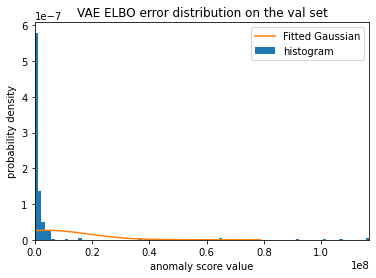

25% percentile: 219348.78332620984
75% percentile: 1662951.358083623
These windows scored the top 1% of anomaly metric (97305212.85857773): 
[31 32 33 34]


In [23]:
# Histogram of VAE ELBO loss - validation set
vae_elbo_m, vae_elbo_std = plot_histogram(val_vae_elbo_loss, 100, 
                                          'VAE ELBO error distribution on the val set', 
                                          mean=None, std=None, xlim=None)

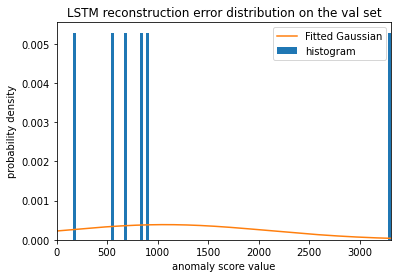

25% percentile: 575.6949769256207
75% percentile: 884.3007444488416
These windows scored the top 1% of anomaly metric (3191.8401347345375): 
0


In [24]:
# Histogram of LSTM reconstruction error - validation set 
#  --> to decide the anomaly detection threshold
lstm_recons_m, lstm_recons_std = plot_histogram(val_lstm_recons_error, 100,  
                                              'LSTM reconstruction error distribution on the val set', 
                                              mean=None, std=None, xlim=None)

In [25]:
# Evaluate the anomaly metrics on the test windows and sequences
n_test_lstm = test_seq1.shape[0]

test_lstm_recons_error, test_lstm_embedding_error = np.zeros(n_test_lstm), np.zeros(n_test_lstm)
for i in range(n_test_lstm):
    test_lstm_recons_error[i], test_lstm_embedding_error[i] = evaluate_lstm_anomaly_metric_for_a_seq(test_seq1[i])
print("All windows' reconstruction error is computed.")
print("The total number of windows is {}".format(len(test_lstm_recons_error)))

All windows' reconstruction error is computed.
The total number of windows is 425


25% percentile: 116.51551701910162
75% percentile: 120.96330343683233
These windows scored the top 1% of anomaly metric (35383.5463009476): 
[0 1 2 3 4]


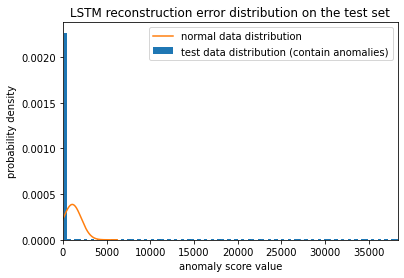

In [26]:
# Histogram of LSTM reconstruction error - test set 
#  --> to detect anomaly now
_, _ = plot_histogram(test_lstm_recons_error, 100,
                      'LSTM reconstruction error distribution on the test set', 
                      mean=lstm_recons_m, std=lstm_recons_std, xlim=None, saveplot=True)

In [27]:
# Produce the ground truth anomaly indices 
# if result['idx_split'][0] == 0:
#     idx_anomaly_test = result['idx_anomaly_test']
# else:
#     idx_anomaly_test = result['idx_anomaly_test'][0]

idx_anomaly_test = result1['idx_anomaly_test'] 
#여기 result를 result1으로 바꾸었다.
print("idx_anomaly_test",idx_anomaly_test)   
anomaly_index_lstm = []
test_labels_lstm = np.zeros(n_test_lstm)
for i in range(len(idx_anomaly_test)):
    idx_start = idx_anomaly_test[i]-(config['l_win']*config['l_seq']-1)
    idx_end = idx_anomaly_test[i]+1
    if idx_start < 0:
        idx_start = 0
    if idx_end > n_test_lstm:
        idx_end = n_test_lstm
    anomaly_index_lstm.append(np.arange(idx_start,idx_end))
    test_labels_lstm[idx_start:idx_end] = 1
print("anomaly_index_lstm",anomaly_index_lstm)    
print(test_labels_lstm.shape)

idx_anomaly_test [242 589]
anomaly_index_lstm [array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 

In [28]:
def return_anomaly_idx_by_threshold(test_anomaly_metric, threshold):
    test_list = np.squeeze(np.ndarray.flatten(test_anomaly_metric))
    # print("test_list.shape",test_list.shape)
    # print("test_list",test_list)
    idx_error = np.squeeze(np.argwhere(test_anomaly_metric > threshold))
    # print("idx_error",idx_error)
    if len(idx_error.shape) == 0:
        idx_error = np.expand_dims(idx_error, 0)
    
    return list(idx_error)

In [29]:
def augment_detected_idx(idx_detected_anomaly, anomaly_index):
    n_anomaly = len(anomaly_index)
    idx_detected_anomaly_extended = list(idx_detected_anomaly)
    for i in range(n_anomaly):
        #print(idx_detected_anomaly)
        for j in idx_detected_anomaly:
            if j in anomaly_index[i]:
                in_original_detection = set(idx_detected_anomaly_extended)
                currect_anomaly_win = set(anomaly_index[i])
                idx_detected_anomaly_extended = idx_detected_anomaly_extended + list(currect_anomaly_win - in_original_detection)
                #print(j)
                break
                
    return list(np.sort(idx_detected_anomaly_extended))

In [30]:
def count_TP_FP_FN(idx_detected_anomaly, anomaly_index, test_labels):
    n_TP = 0
    n_FP = 0
    n_detection = len(idx_detected_anomaly)
    for i in range(n_detection):
        if test_labels[idx_detected_anomaly[i]] == 1:
            n_TP = n_TP + 1
        else:
            n_FP = n_FP + 1
    # print(n_detection)
    idx_undetected = list(set(np.arange(len(test_labels)))- set(idx_detected_anomaly))
    n_FN = 0
    for i in idx_undetected:
        if test_labels[i] == 1:
            n_FN = n_FN + 1
    # print("1.n_TP",n_TP,"n_FP",n_FP)
    # print("presision",precision)
    return n_TP, n_FP, n_FN

In [31]:
def compute_precision_and_recall(idx_detected_anomaly, anomaly_index, test_labels):
    # compute true positive
    n_TP, n_FP, n_FN = count_TP_FP_FN(idx_detected_anomaly, anomaly_index, test_labels)
    
    if n_TP + n_FP == 0:
        precision = 1
    else:
        precision = n_TP / (n_TP + n_FP)
    # print("n_TP",n_TP,"n_FP",n_FP)
    # print("presision",precision)
    recall = n_TP / (n_TP + n_FN)
    if precision + recall == 0:
        F1 = 0
    else:
        F1 = 2* (precision * recall)/(precision + recall)
    
    return precision, recall, F1, n_TP, n_FP, n_FN

In [32]:
n_threshold = 113
precision = np.zeros(n_threshold)
recall = np.zeros(n_threshold)
F1 = np.zeros(n_threshold)
precision_aug = np.zeros(n_threshold)
recall_aug = np.zeros(n_threshold)
F1_aug = np.zeros(n_threshold)
i = 0

threshold_list = np.linspace(np.amin(test_lstm_recons_error), np.amax(test_lstm_recons_error), n_threshold, endpoint=True)
threshold_list = np.flip(threshold_list)
# print(test_lstm_recons_error)
# print(threshold_list)

# print(idx_detection_lstm)
# print(anomaly_index_lstm)
# print(test_labels_lstm)

for threshold in threshold_list:
    #print(threshold_list[i])
    idx_detection_lstm = return_anomaly_idx_by_threshold(test_lstm_recons_error, threshold)
    precision[i], recall[i], F1[i], _, _, _ = compute_precision_and_recall(idx_detection_lstm, 
                                                                           anomaly_index_lstm, 
                                                                           test_labels_lstm)
    # augment the detection using the ground truth labels
    # a method to discount the factor one anomaly appears in multiple consecutive windows
    # introduced in "Unsupervised anomaly detection via variational auto-encoder for seasonal kpis in web applications"
    idx_detection_lstm_augmented = augment_detected_idx(idx_detection_lstm, anomaly_index_lstm)
    precision_aug[i], recall_aug[i], F1_aug[i], _, _, _ = compute_precision_and_recall(idx_detection_lstm_augmented, 
                                                                                       anomaly_index_lstm, 
                                                                                       test_labels_lstm)
    i = i + 1
    #print(precision, recall, F1)

In [33]:
print("Best F1 score is {}".format(np.amax(F1)))
idx_best_threshold = np.squeeze(np.argwhere(F1 == np.amax(F1)))
print("Best threshold is {}".format(threshold_list[idx_best_threshold]))
print("At this threshold, precision is {}, recall is {}".format(precision[idx_best_threshold], recall[idx_best_threshold]))
average_precision = np.sum(precision[1:] * (recall[1:] - recall[:-1]))
print("Average precision is {}".format(average_precision))

print("\nAugmented detection:")
print("Best F1 score is {}".format(np.amax(F1_aug)))
idx_best_threshold = np.squeeze(np.argwhere(F1_aug == np.amax(F1_aug)))
print("Best threshold is {}".format(threshold_list[idx_best_threshold]))
print("At this threshold, precision is {}, recall is {}".format(precision_aug[idx_best_threshold], 
                                                                recall_aug[idx_best_threshold]))

average_precision_aug = np.sum(precision_aug[1:] * (recall_aug[1:] - recall_aug[:-1]))
print("Average precision is {}".format(average_precision_aug))

Best F1 score is 0.9988221436984689
Best threshold is 110.01351369793073
At this threshold, precision is 1.0, recall is 0.9976470588235294
Average precision is 0.9976470588235293

Augmented detection:
Best F1 score is 1.0
Best threshold is [28434.69422952 28093.43301608 27752.17180263 27410.91058919
 27069.64937574 26728.3881623  26387.12694886 26045.86573541
 25704.60452197 25363.34330853 25022.08209508 24680.82088164
 24339.5596682  23998.29845475 23657.03724131 23315.77602786
 22974.51481442 22633.25360098 22291.99238753 21950.73117409
 21609.46996065 21268.2087472  20926.94753376 20585.68632032
 20244.42510687 19903.16389343 19561.90267998 19220.64146654
 18879.3802531  18538.11903965 18196.85782621 17855.59661277
 17514.33539932 17173.07418588 16831.81297244 16490.55175899
 16149.29054555 15808.0293321  15466.76811866 15125.50690522
 14784.24569177 14442.98447833 14101.72326489 13760.46205144
 13419.200838   13077.93962456 12736.67841111 12395.41719767
 12054.15598422 11712.894770

In [40]:
# Now select a threshold
threshold =110
#threshold : 110~120 
print("Threshold is {}".format(threshold))
idx_detection = return_anomaly_idx_by_threshold(test_lstm_recons_error, threshold)
idx_detection_augmented = augment_detected_idx(idx_detection, anomaly_index_lstm)
precision, recall, F1, n_TP, n_FP, n_FN = compute_precision_and_recall(idx_detection_augmented, 
                                                                       anomaly_index_lstm, 
                                                                       test_labels_lstm)
print("\nPR evaluation using augmented detection:")
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1: {}".format(F1))
print("TP: {}".format(n_TP))
print("FP: {}".format(n_FP))
print("FN: {}".format(n_FN))
# print("TN: {}",format(n_TN))

Threshold is 110

PR evaluation using augmented detection:
Precision: 1.0
Recall: 1.0
F1: 1.0
TP: 425
FP: 0
FN: 0


In [35]:
def slice_detected_indices_into_seq(idx_detection, interval):
    detected_seq = []
    i = 0
    while i < len(idx_detection):
        if i == 0:
            cur_seq = [idx_detection[i]]
            i = i + 1
        else:
            if idx_detection[i] - idx_detection[i-1] > interval:
                detected_seq.append(cur_seq)
                cur_seq = [idx_detection[i]]
            else:
                cur_seq.append(idx_detection[i])
                if i == len(idx_detection) - 1:
                    detected_seq.append(cur_seq)
            i = i + 1
    
    print("Detected {} sequences".format(len(detected_seq)))
    return detected_seq

In [36]:
def plot_detected_anomalies(idx_detection, interval, result1, result2,result3,detection_method, augmented_flag=1, y_scale=5, y_lim=None):
    detected_seq = slice_detected_indices_into_seq(idx_detection, interval=interval)
    t_test1 = result1['t_test']
    test1= result1['test']
    idx_anomaly_test = result1['idx_anomaly_test']
    t_test2 = result2['t_test']
    test2= result2['test']
    t_test3 = result3['t_test']
    test3= result3['test']   
    # plot detected sequences
    fig, axs = plt.subplots(1, 1, figsize=(18, 5), edgecolor='k')
    fig.subplots_adjust(hspace=.4, wspace=.4)
    axs.plot(t_test1,test1,t_test2,test2,t_test3,test3)
    for j in range(len(idx_anomaly_test)):
        if j == 0:
            axs.plot(idx_anomaly_test[j] * np.ones(20), np.linspace(-y_scale, y_scale, 20), 'r--', label='true anomalies')
        else:
            axs.plot(idx_anomaly_test[j] * np.ones(20), np.linspace(-y_scale, y_scale, 20), 'r--')
        
    for i in range(len(detected_seq)):
        for j in detected_seq[i]:
            if j == detected_seq[0][0]:
                axs.plot((j+interval*2) * np.ones(20), np.linspace(-y_scale, -0.8*y_scale, 20), 'g-', label='detected anomalies')
            else:
                axs.plot((j+interval*2) * np.ones(20), np.linspace(-y_scale, -0.8*y_scale, 20), 'g-')
    
    for j in range(len(idx_anomaly_test)):
        axs.plot(idx_anomaly_test[j] * np.ones(20), np.linspace(-y_scale, y_scale, 20), 'r--')

    for i in range(len(detected_seq)):
        interval_x = np.asarray([detected_seq[i][0], detected_seq[i][-1]+interval*2])
        interval_y = np.asarray([y_scale,y_scale])
        if i == 0:
            axs.fill_between(interval_x, interval_y, alpha=0.2, color='y', label='detected anomaly windows')
        else:
            axs.fill_between(interval_x, interval_y, alpha=0.2, color='y')
        interval_y = np.asarray([-y_scale,-y_scale])
        axs.fill_between(interval_x, interval_y, alpha=0.2, color='y')
    axs.grid(True)
    axs.set_xlim(0, len(t_test1))
    if y_lim is None:
        axs.set_ylim(-y_scale, y_scale)
    else:
        axs.set_ylim(-y_scale, y_lim)
    axs.set_xlabel("timestamp (every {})".format(result['t_unit']))
    axs.set_ylabel("normalised readings")
    
    axs.legend()
    savefig(config['result_dir']+'detected_anomalies_{}_aug_{}.pdf'.format(detection_method, augmented_flag))

Detected 1 sequences


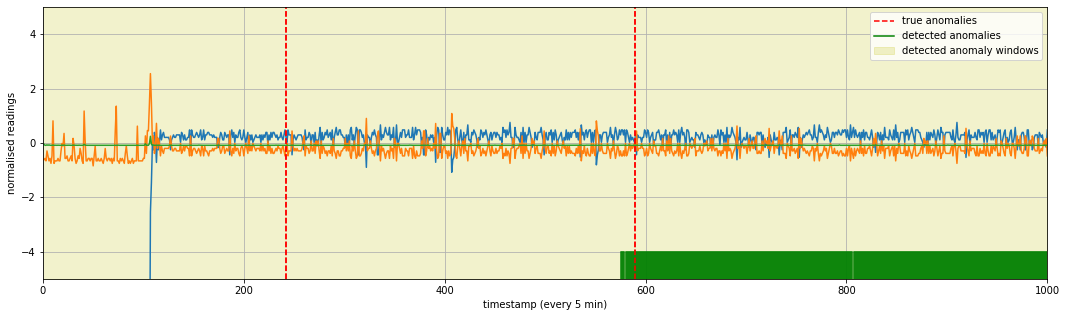

In [37]:
plot_detected_anomalies(idx_detection_augmented, 
                        interval=config['l_win']*config['l_seq']/2, 
                        result1=result1,
                        result2=result2,
                        result3=result3,
                        detection_method='lstm reconstruction error',
                        augmented_flag=1,
                        y_scale=5,
                        y_lim=5)